<a href="https://colab.research.google.com/github/JoDeMiro/DeepLearningIntroduction/blob/main/Basic_Image_Studies_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Megvilágosodás - folytatás

Az első rész a GitHub.com repoban <a href="https://github.com/JoDeMiro/DeepLearningIntroduction">link</a> elolvasható.

Irhattam volna csupa nagybetűvel is.

Két kísérlet jutott eszembe, de lehet, hogy csak az egyiket fogom megcsinálni, mindenesetre röggtön két frameworkben. Kerasban és Scikit Learnben. Ha már nagyon jó leszek akkor megcsinálom PyTorchban.

Nos a megvilágosodás.

Vegyük a két alapesetet.

Osztályozás (ahogy én szeretem hívni klasszifikáció) és regresszó.

Nézzük a következő esetet. Van két darab (igen 2 db) képünk.

Szeretnénk megtanítani egy algoritmusnak, hogy tudjon különbséget tenni a két kép között. Kismillió módszer létezik, de most vegyünk egy neurális hálót. Az egyszerűség kedvéért legyen egy nem túl nagy négyzetes kép egyenló oldal hosszúsággal.

Hogyan tanítjuk fel két kép alapján a neurális hálót?

Leginkább sehogyan, de ha mégis akkor gondoljok végig magának a tanulásnak a folyamatát. A Backprop vagyis az Error Backprop és a Gradiesn Descent a hiba alapján működik.

Nos két kép esetén mi lesz a hiba?

A tanítás során a következő lehetőségek lépnek fel.
1. egyszerre egy képet adunk oda egy iterációban, ezalapján kiszámolja a hibát és módosít a rendszeren.
2. mindkét képet odaadjuk egy iteráció során. Ekkor vagy minkettőt helyesen klasszifikálja, vagy egyiket, vagy másikat helyesen klasszifikálja, de olyan nincs, hogy egyiket sem klasszifikálja helyesen. Tegyük fel, hogy Binary Classification-ról van szó.

Nos akkor nézzük meg, hogy ezekben az esetekben, hogyan szökkenthető a hiba?

Hogyan csökkenthető, ha összesen két, vagy három kimenete van?

Tegyük hozzá, hogy maga a hiba nem dichotom, hanem SoftMax esetén egy folytonos változó.!

# Ezt azzal folytatom, hogy [...]

Korábban megnéztem, hogy működik a klasszifikáció.

Alapból két képet vettem és két osztályként deffiniáltam őket.

Erre tanítottam fel egy neurális hálót különböző modokon.

Most viszont vegyük azt az esetet, hogy van két képem (vagy csak egy), de nem az osztályhovatartozást szeretném neki megtani, hanem egy olyan modelt szeretnék létrehozni, ami az adott pixelek kimenetelét mondja meg -> az adott pixelek alapján.

Hm..

Ennek mi értelme van.

Elsőre semmi de ez csak egy lépés abban amit később szeretnék elérni.

### Erről most röviden csak annyit, hogy [...]

Egy speciális hibafüggvényt szeretnék majd előállítani.

Amit most csinálok az egy köztes lépés abban, hogy ezt a rendszert jobban megértsem.


### Ezért az amit most csinálok az egy Autoencoder lesz

Egy kép esetén ennek nyilván semmi értelme hiszen img(pix) -> img(pix) tök mindegy milyen modelt adok meg neki, vagy hány köztes régegre csökkentem le mert egy konkrét kép esetén ugyis meg tudja tanulni a kimeneti rétegen azokat a súlyokat amivel le tudja nullázni a bedclési hibát.

Ezért maradjunk abban, hogy kezdjünk egy képpel, csak hogy lássuk, hogy alakulnak a súlyok - ennek nem lesz semmi értelme, aztán menjünk át két képre.

Ez már érdekesebb lesz, mert nem fogja tudni úgy megtanulni az utolsó rétegen a sulyokat, hogy nulláza vele a hibát.

Haladjunk szépen sorban.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor

In [ ]:
%%capture
!rm *.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png

In [ ]:
import skimage.io
import skimage.transform

In [ ]:
pic1 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

print(type(pic1))

print(pic1.shape)

red1   = pic1[:, :, 0]
green1 = pic1[:, :, 1]
blue1  = pic1[:, :, 2]

<class 'numpy.ndarray'>
(400, 610, 3)


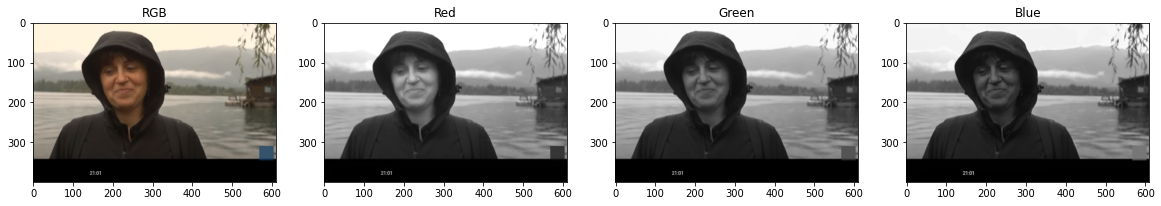

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic1, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red1, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green1, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue1, cmap='gray'); ax4.set_title('Blue')

plt.show()

In [ ]:
pic2 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

print(type(pic2))

print(pic2.shape)

red2   = pic2[:, :, 0]
green2 = pic2[:, :, 1]
blue2  = pic2[:, :, 2]

<class 'numpy.ndarray'>
(400, 610, 3)


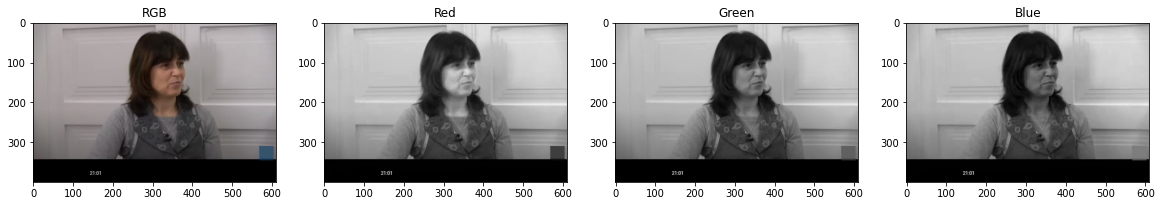

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic2, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red2, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green2, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue2, cmap='gray'); ax4.set_title('Blue')

plt.show()

In [ ]:
def get_picture(file = 'https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png'):
  pic = skimage.io.imread(file)

  print(type(pic))
  print(pic.shape)

  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  return pic, red, green, blue


def show_irgb(pic):
  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('RGB')
  ax2.imshow(red, cmap='gray'); ax2.set_title('Red')
  ax3.imshow(green, cmap='gray'); ax3.set_title('Green')
  ax4.imshow(blue, cmap='gray'); ax4.set_title('Blue')

  plt.show()

def show_gray(pic):
  fig, (ax1) = plt.subplots(1, 1, figsize=(5, 8))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('Gray')

  plt.show()

def crop_img(pic, x, y, w, h):
  red_   = pic[y:y+h, x:x+w, 0]
  green_ = pic[y:y+h, x:x+w, 1]
  blue_  = pic[y:y+h, x:x+w, 2]
  pic_   = pic[y:y+h, x:x+w, :]

  return pic_, red_, green_, blue_

def resize_img(pic, w, h):
  pic_ = skimage.transform.resize(pic, (w, h))

  red_   = pic_[:, :, 0]
  green_ = pic_[:, :, 1]
  blue_  = pic_[:, :, 2]

  return pic_, red_, green_, blue_

def to_gray_img(pic):

  grey_ = (pic[:, :, 0] + pic[:, :, 1] + pic[:, :, 0])/3

  return grey_


<class 'numpy.ndarray'>
(400, 610, 3)


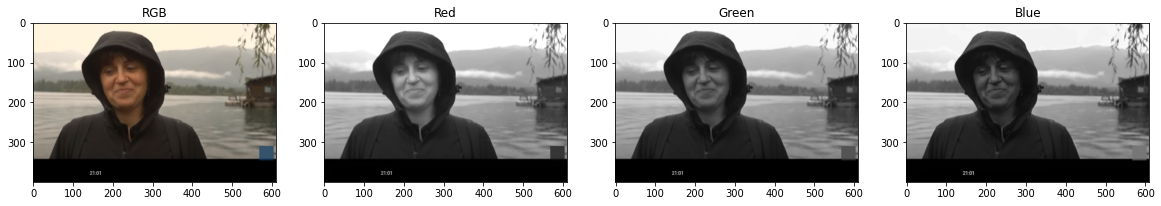

In [ ]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

show_irgb(img)

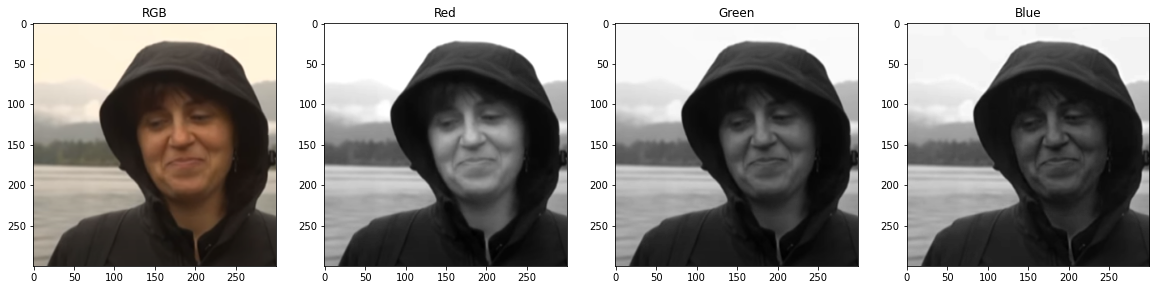

In [ ]:
croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

show_irgb(croped_img)


<class 'numpy.ndarray'>
(400, 610, 3)


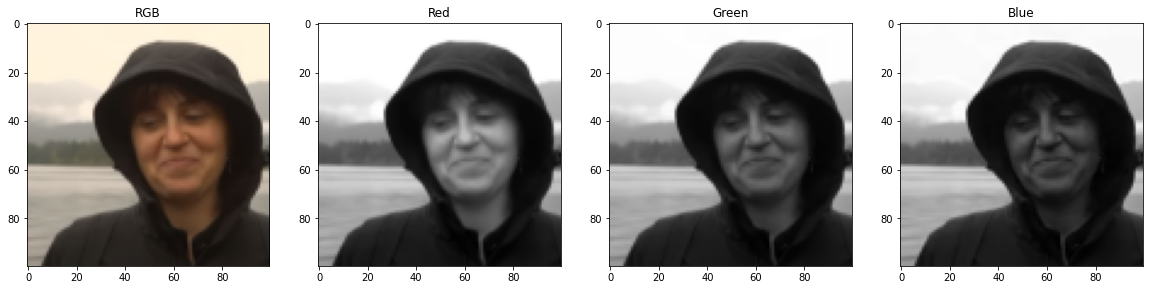

In [ ]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

woman1 = resized_img

show_irgb(woman1)

<class 'numpy.ndarray'>
(400, 610, 3)


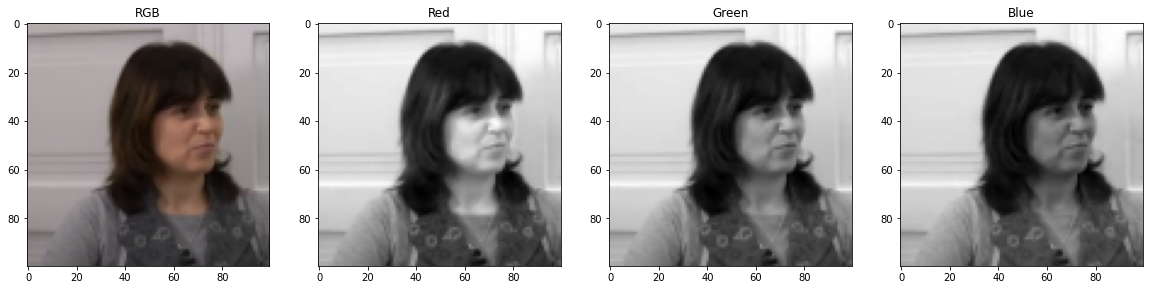

In [ ]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

croped_img, _, _, _ = crop_img(img, 140, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

woman2 = resized_img

show_irgb(woman2)

<class 'numpy.ndarray'>
(400, 610, 3)


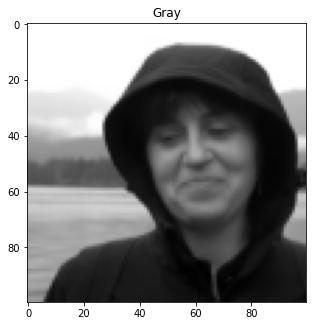

In [ ]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

gray_img = to_gray_img(resized_img)

woman1 = gray_img

show_gray(woman1)

<class 'numpy.ndarray'>
(400, 610, 3)


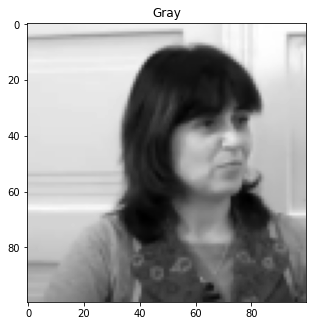

In [ ]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

croped_img, _, _, _ = crop_img(img, 140, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

gray_img = to_gray_img(resized_img)

woman2 = gray_img

show_gray(woman2)

# Meg van a két képem, készítsük el az autoencodert egy kép esetére

Sok sok transzformáció, hogy a gépi tanuláshoz szükséges könyvtárak számára emészthető formába hozzuk.

In [ ]:
X1 = woman1.ravel()
X2 = woman2.ravel()

print(X1.shape)
print(X2.shape)

X = np.array([X1, X2])                # Ha a két kép kéne de most csak egy
X = np.array([X1])

print(X.shape)

y = np.array([0, 1])                  # Nem kategorizálok, hanem pix -> pix
y = X.copy()

print(y.shape)

(10000,)
(10000,)
(1, 10000)
(1, 10000)


In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(100, ),
                   activation='relu',
                   solver='adam',
                   batch_size=1,
                   learning_rate='constant',
                   learning_rate_init=0.001,
                   max_iter=100,
                   shuffle=False,
                   random_state=1,
                   verbose=0,
                   validation_fraction=0.0,
                   n_iter_no_change=200)

In [ ]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

mlp.fit(X, y)

MLPRegressor(batch_size=1, max_iter=100, n_iter_no_change=200, random_state=1,
             shuffle=False, validation_fraction=0.0, verbose=0)

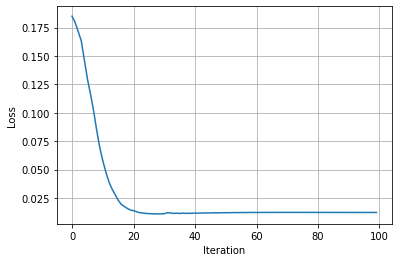

In [ ]:
def plot_loss(mlp):
  plt.figure(figsize=(6, 4))
  if hasattr(mlp, 'loss_curve_'):
    plt.plot(mlp.loss_curve_)
  if type(mlp) == list:
    plt.plot(mlp)
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.grid()
  plt.show()

plot_loss(mlp)

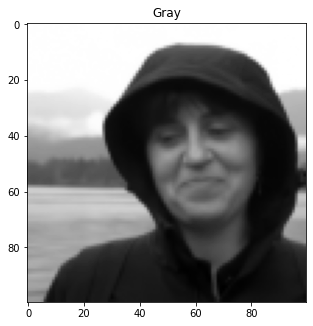

In [ ]:
# Csak a vicc kedvéért forgassuk már vissza a becslést és nézzük meg, hogy
# nézne ki --> lehet, hogy a hiden_layer = (100, ) elsőre sok neki

pred_y = mlp.predict(X)

retransformed_img = pred_y.ravel().reshape(100,100)

show_gray(retransformed_img)

0.18502962776589713


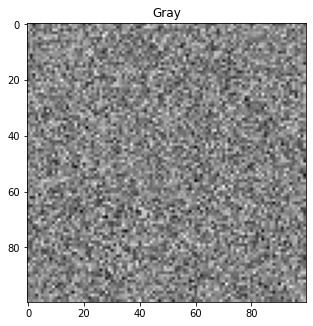

0.013824157919718631


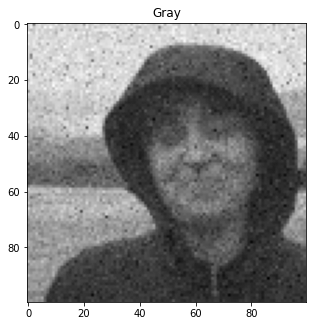

0.011699295440217816


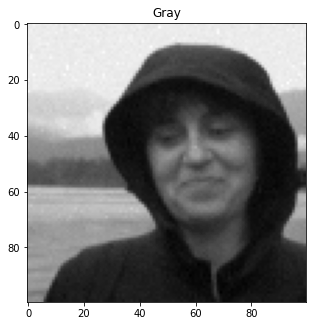

0.012259488077688046


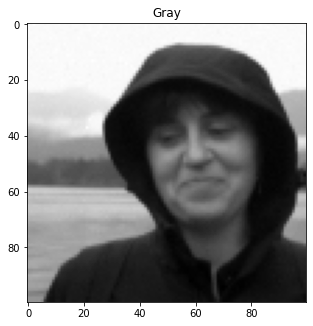

0.01229874272303756


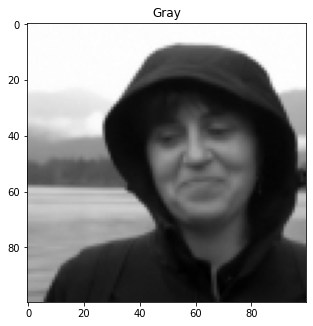

In [ ]:
# Nézzük végig a folyamatot

mlp = MLPRegressor(hidden_layer_sizes=(100, ),
                   activation='relu',
                   solver='adam',
                   batch_size=1,
                   learning_rate='constant',
                   learning_rate_init=0.001,
                   max_iter=1,
                   shuffle=False,
                   random_state=1,
                   warm_start=True,
                   verbose=0,
                   validation_fraction=0.0,
                   n_iter_no_change=200)

loss_history = []

for i in range(100):
  mlp.partial_fit(X, y)           # --> ha nem partial.fit akkor az egész rossz, nem azonos eredményt ad mint a warm_start=False
  loss_history.append(mlp.loss_)
  if( i % 20 == 0 ):
    print(mlp.loss_)
    pred_y = mlp.predict(X)
    retransformed_img = pred_y.ravel().reshape(100,100)
    show_gray(retransformed_img)


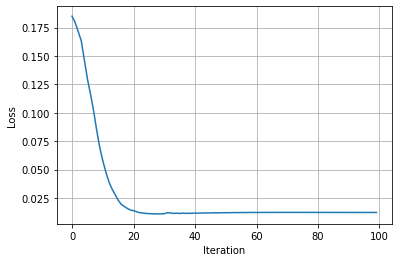

In [ ]:
plot_loss(mlp)



# Szuper egy kép esetén az történik amit vártunk [...]

Haladjunk tovább nézzük meg, hogy két kép esetén mi a helyzet, illetve egy picit bohockodjunk még el azon, hogy simán 2 neuront engedek neki a köztes rétegen. Elvileg ugyan úgy tökéletes becslést fog adni mivel csak egy kép van.

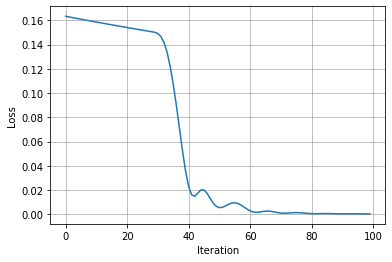

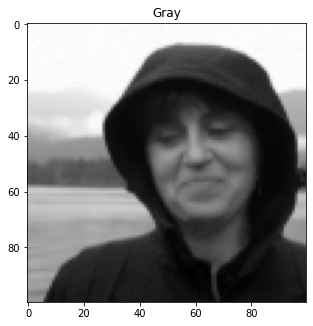

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(2, ),
                   activation='relu',
                   solver='adam',
                   batch_size=1,
                   learning_rate='constant',
                   learning_rate_init=0.001,
                   max_iter=100,
                   shuffle=False,
                   random_state=1,
                   verbose=0,
                   validation_fraction=0.0,
                   n_iter_no_change=200)

mlp.fit(X, y)

plot_loss(mlp)

pred_y = mlp.predict(X)

retransformed_img = pred_y.ravel().reshape(100,100)

show_gray(retransformed_img)

0.16330881543776546


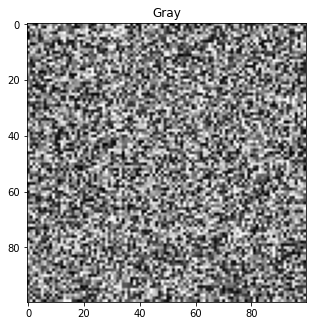

0.15401164131031414


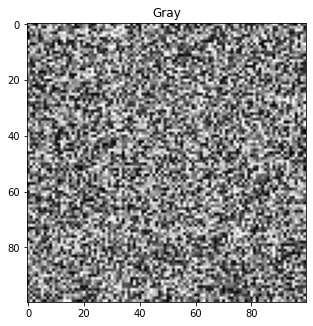

0.02295090267822976


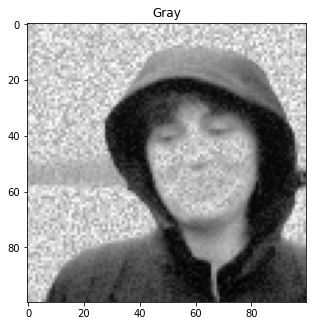

0.002908460912880539


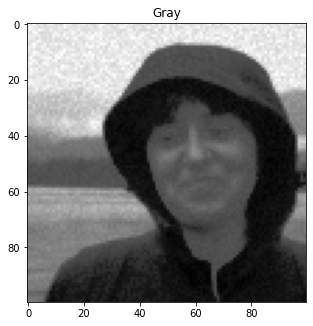

0.0006096101635933706


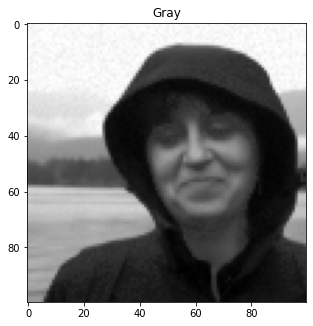

0.0003924853911614919


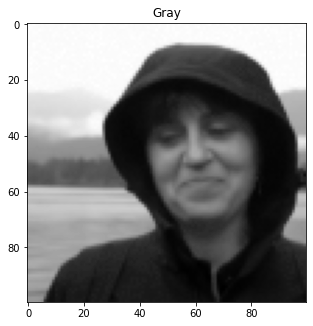

In [ ]:
# Nézzük végig a folyamatot

mlp = MLPRegressor(hidden_layer_sizes=(2, ),
                   activation='relu',
                   solver='adam',
                   batch_size=1,
                   learning_rate='constant',
                   learning_rate_init=0.001,
                   max_iter=1,
                   shuffle=False,
                   random_state=1,
                   warm_start=True,
                   verbose=0,
                   validation_fraction=0.0,
                   n_iter_no_change=200)

loss_history = []

for i in range(101):
  mlp.partial_fit(X, y)           # --> ha nem partial.fit akkor az egész rossz, nem azonos eredményt ad mint a warm_start=False
  loss_history.append(mlp.loss_)
  if( i % 20 == 0 ):
    print(mlp.loss_)
    pred_y = mlp.predict(X)
    retransformed_img = pred_y.ravel().reshape(100,100)
    show_gray(retransformed_img)


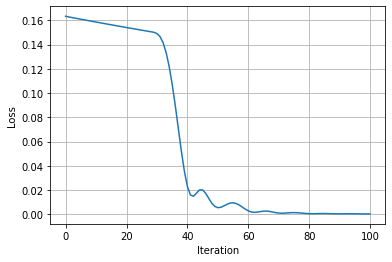

In [ ]:
plot_loss(mlp)

# Szuper, hogyan tovább [...]

In [ ]:
# Nézzük meg ugyan ezt a logikát két úgy, hogy nem egyetlen egy adat van,
# próbáljuk ki két képpel


In [ ]:
# De elötte még kíváncsiságból

# Na most jön az, hogy csak a vicc kedvéért nézzük meg, 
# hogy teljeseítene ez a két képen tanított model
# olyan képeken amelyek nagyon hasonlítanak
# az eredeti állapothoz.



In [ ]:
# Egy hasonló képen


In [ ]:
%%capture
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman1_test1.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman1_test2.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/Woman/woman1_test3.png



<class 'numpy.ndarray'>
(400, 610, 3)


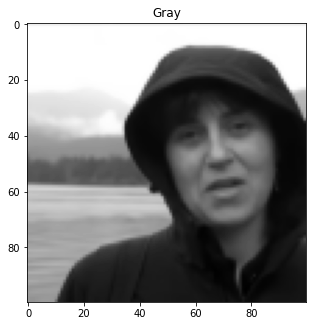

(10000,)
(1, 10000)


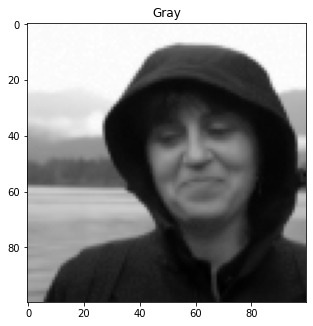

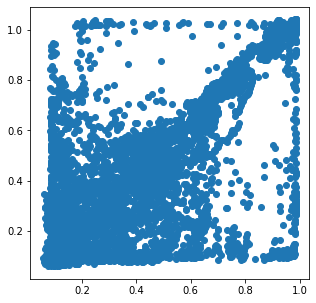

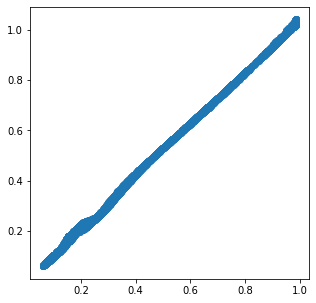

In [ ]:
woman1_test1 = 'woman1_test1.png'

img, _, _, _ = get_picture(woman1_test1)
croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)
resized_img, _, _, _, = resize_img(croped_img, 100, 100)
gray_img = to_gray_img(resized_img)

woman1_test1 = gray_img
show_gray(woman1_test1)

X1_test1 = woman1_test1.ravel()

print(X1_test1.shape)

X_test = np.array([X1, X2])                # Ha a két kép kéne de most csak egy
X_test = np.array([X1_test1])

print(X_test.shape)

pred_y_test1 = mlp.predict(X_test)
retransformed_img = pred_y_test1.ravel().reshape(100,100)
show_gray(retransformed_img)

# mi van a becsült és a valós között?
plt.figure(figsize=(5, 5))
plt.scatter(X_test, pred_y_test1)
plt.show()

# mi van a becsült és amin tanultunk között?
plt.figure(figsize=(5, 5))
plt.scatter(X, pred_y_test1)
plt.show()


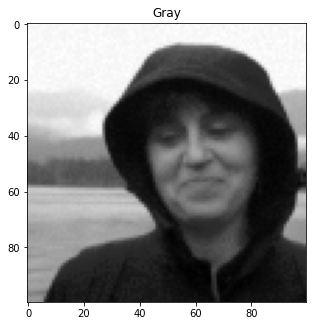

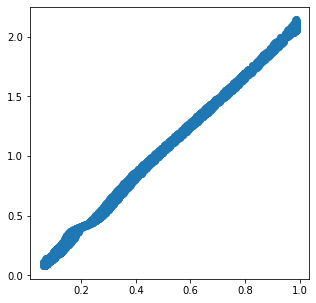

In [ ]:
# Kb az van, hogy bármilyen bemenetet adok, a feltanult neurális háló azt az egy adott képet állítja elő amin tanult?


X1_ones = np.ones(X.size)

X_test = np.array([X1_ones])

pred_y_test_ones = mlp.predict(X_test)
retransformed_img = pred_y_test_ones.ravel().reshape(100,100)
show_gray(retransformed_img)

# mi van a becsült és amin tanultunk között?
plt.figure(figsize=(5, 5))
plt.scatter(X, pred_y_test_ones)
plt.show()

# Oké akkor most két képpel [...]

In [ ]:
X1 = woman1.ravel()
X2 = woman2.ravel()

print(X1.shape)
print(X2.shape)

X = np.array([X1, X2])                # Ha a két kép kéne de most csak egy

print(X.shape)

y = np.array([X1, X2])                # Nem kategorizálok, hanem pix -> pix

print(y.shape)



(10000,)
(10000,)
(2, 10000)
(2, 10000)


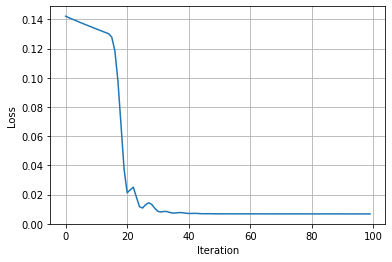

In [ ]:
# Nézzük végig a folyamatot

mlp = MLPRegressor(hidden_layer_sizes=(2, ),
                   activation='relu',
                   solver='adam',
                   batch_size=1,
                   learning_rate='constant',
                   learning_rate_init=0.001,
                   max_iter=100,
                   shuffle=False,
                   random_state=1,
                   warm_start=False,
                   verbose=0,
                   validation_fraction=0.0,
                   n_iter_no_change=200)

mlp.fit(X, y)

plot_loss(mlp)



In [ ]:
print('X.shape = ', X.shape)
print('y.shape = ', y.shape)

X.shape =  (2, 10000)
y.shape =  (2, 10000)


In [ ]:
X[0:1].shape

(1, 10000)

In [ ]:
X[0].shape

(10000,)

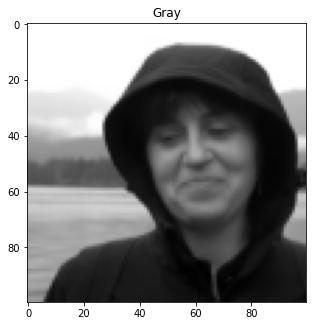

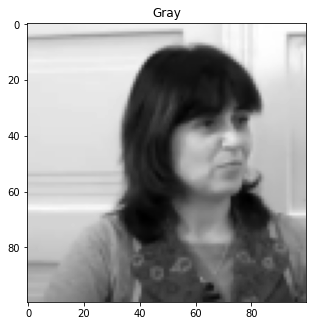

In [ ]:
show_gray(X[0].reshape(100, 100))

show_gray(X[1].reshape(100, 100))

In [ ]:
pred_y_1 = mlp.predict(X)

In [ ]:
pred_y_1.shape

(2, 10000)

In [ ]:
retransformed_img_1 = pred_y_1[0].ravel().reshape(100, 100)

In [ ]:
retransformed_img_1.shape

(100, 100)

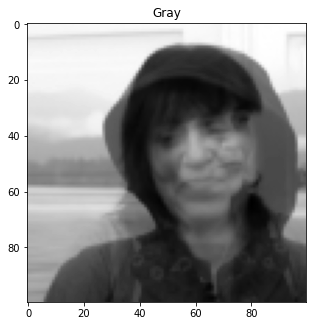

In [ ]:
show_gray(retransformed_img_1)

# Miért látok ilyen szellemképes maszatot?

In [ ]:
# Itt azt történik, hogy van egy neurális hálónk, aminek két adaton azt tanítottuk meg, hogy milyen súlyokat kell
# kialakítania, hogy a bemeneti képekből előállítsa a kimeneti képet.

# A csalafintaság a dologban, hogy az architektúrának és a hozzá tartozó súlyoknak képesnek kell lenniük mindkét
# kép esetén előállítani a bemenetből a kimeneti adatokat.

# Mivel az architektúra fix és a súlyok rögzítettek a tanulás után ezért képtelenség tökéletes megoldást találnia
# csak olyat amivel minimalizálni tudja a hibát.

# A model loss_curve_ tanulási görbélyéből látszik, hogy már a tanulás során sem volt képes tökéletes eredményt
# elérnie. A hiba nem ment egy bizonyos szint alá. De nem is tud, ha jobban belegodolunk, hogy egy olyan
# neurális hálót kéne felépítenie ami egy rétegen képes megtalálni az összes olyan súlyt, amivel mindkét
# képet képes előállítani. Képtelenség.

# És mi történne, ha két rétegen próbálnánk meg a másodikon két neuronnal?

In [ ]:
# Jó kérdés

In [ ]:
X1 = woman1.ravel()
X2 = woman2.ravel()

print(X1.shape)
print(X2.shape)

X = np.array([X1, X2])                # Ha a két kép kéne de most csak egy

print(X.shape)

(10000,)
(10000,)
(2, 10000)


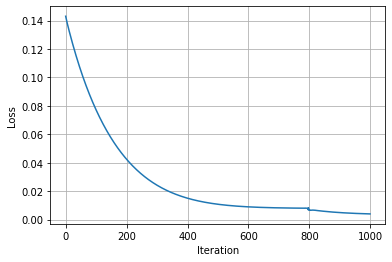

In [ ]:
# Nézzük végig a folyamatot

mlp = MLPRegressor(hidden_layer_sizes=(10, 2),
                   activation='relu',
                   solver='adam',
                   batch_size=1,
                   learning_rate='constant',
                   learning_rate_init=0.001,
                   max_iter=1000,
                   shuffle=False,
                   random_state=1,
                   warm_start=False,
                   verbose=0,
                   validation_fraction=0.0,
                   n_iter_no_change=1000)

mlp.fit(X, y)

plot_loss(mlp)

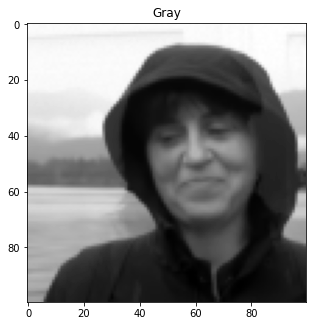

In [ ]:
# show_gray(X[0].reshape(100, 100))
# show_gray(X[1].reshape(100, 100))

pred_y_1 = mlp.predict(X)
pred_y_1.shape

retransformed_img_1 = pred_y_1[0].ravel().reshape(100, 100)
retransformed_img_1.shape

show_gray(retransformed_img_1)


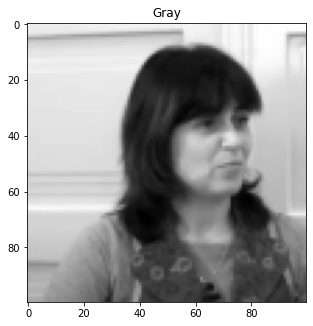

In [ ]:

pred_y_2 = mlp.predict(X)
pred_y_2.shape

retransformed_img_2 = pred_y_2[1].ravel().reshape(100, 100)
retransformed_img_2.shape

show_gray(retransformed_img_2)

# Jó tehát 2 neuronnal sikerült csinálni egy autoecodert két képre

Hogyan tovább?

In [ ]:
# Az eredeti elképzelés valami olyasmi volt, hogy

# 1 csináljak egy autoencodert aminek van egy utolsó elötti rétege ami alacsaonyabb dimenzióba viszi a bemeneteket.

# De miért akartam ilyet csinálni?

# 2 Azért mert valójában arra gondoltam, hogy csinálnék egy olyan modelt, aminek van egy speiciális hibafüggvénye.
# Az egész lényeg, hogy gradiens módszerrel lehessen tanítani.
# Ugyanis ezt a problémát meg lehet csinálni Generikus Algoritmussal, de most nem ez a cél.
# Most az a cél, hogy lehessen gradiens módszerrel keresni a megoldás.

# Hogyan nézne ki a hibafüggvény?

# Elöször hogyan nézne ki a becsült változó?

# A becsült változó legyen egy négy hosszú vektor.
# Legyen egy x, egy y, egy r, egy v
# <X,Y> koordináta, r a rádiusz, v [1, 100] a szinkód [0,255]
# Ezek alapján kiszámolunk egy kört <X,Y,R,V>
# A hiba pedig a kör és a valós kép között MSE.

# Hágy megfigyelési esetünk van?

# Fontos megérteni, hogy egy eset egy kép, de egy képhez nem kör tartozik, tehát nem egy darab <x,y,r,v> vektor,
# Hanem akkor mennyi?

# Egy előre beállított számú, legyen mondjuk 20.

# Hogy néz ki ilyenkor az adathalamaz?

# Jó kérdés.

# Próbáljuk ki azt, hogy a kimenet <x1,y1,r1,v1, x2,y2,r2,v2, ..., xn,yn,rn,vn>

# De ezzel van egy kis baj, méghozzá az, hogy amit én itt kimeneti változóként fogalmaztam meg, az valójában nem ismert.

# A kimeneti változónak ezért valójában a valós képnek vagy az abból képzett vektornak kell lenni.

# Itt inkább arról van szó, hogy az utolsó elötti rétegen speciális neuronoknak kéne lenniük.

# Bemeneten jön egy 10000 hosszú vektor, ezt mondjuk az első rétegen levisszük 80 neuronra.

# Jön egy kép a maga 10000 bemenetével tüzel, átmegy a 80 neuronon.
# A 80 neuron kimenete mindegyik egy egy paraméterhez lenne hozákötve.
# Pl. egyik neuron az x1, másik az y1, harmadik az r1, és így tovább, egészen rn-ig.

# Tehát a neuronok kimenetén létrejövő érték alapján áll elő a köröket előállító paraméterek.

<img src="https://github.com/JoDeMiro/DeepLearningIntroduction/raw/main/Inside/Abra_1.png" />

# Save and Load model

In [ ]:
import pickle

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)



# Visualise net

[  1 100   1]


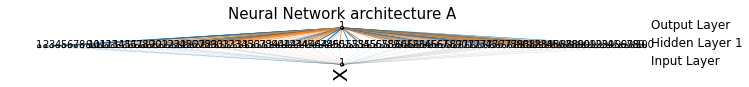

In [ ]:
import os

os.system('rm MLPPlot.py')
os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py')

import MLPPlot

num_input_varialbe = ['X']

# Define the structure of the network
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(mlp.hidden_layer_sizes), [1]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, mlp.coefs_, num_input_varialbe)
network.draw()



```
# JoDeMiro
```

